# Predicting Delivery Delays in a Smart Supply Chain Using XGBoost

## 🧠 Project Objective

This project aims to predict whether an order delivery will be delayed using a real world supply chain dataset. Timely delivery is critical in logistics, and predicting late shipments can help optimize routing, warehouse decisions, and customer satisfaction.

The target variable is `delayed`, engineered based on whether actual shipping duration exceeded scheduled shipping time.

## 📥 Data Import and Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The source of dataset was https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

In [6]:
df = pd.read_csv('supply_chain/DataCoSupplyChainDataset.csv', encoding= 'ISO-8859-1')
pd.set_option('display.max_columns', None)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
des = pd.read_csv('supply_chain/DescriptionDataCoSupplyChain.csv')
des

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [124]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [126]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


## 🧼 Data Cleaning

In [128]:
df.duplicated().sum()

0

In [8]:
# Convert date columns
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['ship_date'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [10]:
# Create shipping duration
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days

In [12]:
# Create custom delay label
df['delayed'] = (df['shipping_duration'] > df['Days for shipment (scheduled)']).astype(int)

The dataset includes a pre-defined binary label called `Late_delivery_risk`, indicating whether an order is considered at risk of late delivery.
However, to ensure full transparency and control in our modeling process, we engineered our own label, `delayed`, based on a simple rule:

delayed = 1 if shipping_duration > scheduled_shipping_days, else 0

We then compared this derived label to the original Late_delivery_risk column:

In [18]:
(df['delayed'] == df['Late_delivery_risk']).value_counts(normalize=True)

True     0.951949
False    0.048051
Name: proportion, dtype: float64

This high degree of consistency suggests that our rule-based label captures the same logic used in the original column for most cases.
However, we proceed with the custom delayed label to ensure traceability and flexibility in defining what constitutes a "late" delivery.

In [14]:
# Drop irrelevant or high-null columns
df = df.drop(columns=['Product Description', 'Order Zipcode', 'Customer Email', 'Customer Fname', 'Customer Lname',
    'Customer Password', 'Customer Id', 'Order Id', 'Order Item Id', 'Order Item Cardprod Id',
    'Product Card Id', 'Product Image', 'Product Status', 'order date (DateOrders)', 'shipping date (DateOrders)'], axis=1)

In [138]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales               

In [16]:
# Drop any remaining nulls (only 3 rows affected)
df.dropna(inplace=True)

In [142]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Mode,order_date,ship_date,shipping_duration,delayed
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,3,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,5,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,4,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,3,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2,0


## 📊 Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Count')

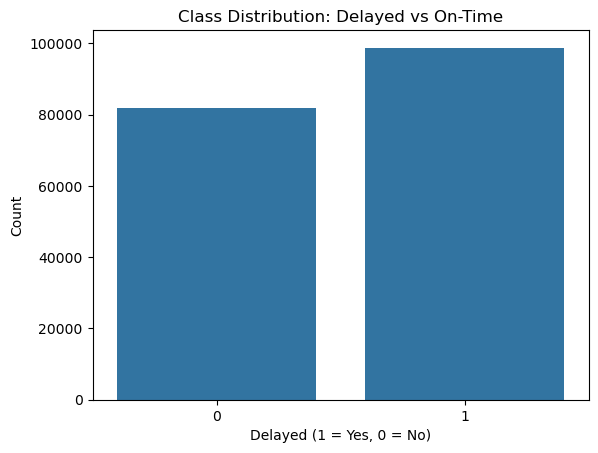

In [265]:
sns.countplot(df, x = 'delayed')
plt.title("Class Distribution: Delayed vs On-Time")
plt.xlabel("Delayed (1 = Yes, 0 = No)")
plt.ylabel("Count")

([0, 1, 2, 3],
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Same Day')])

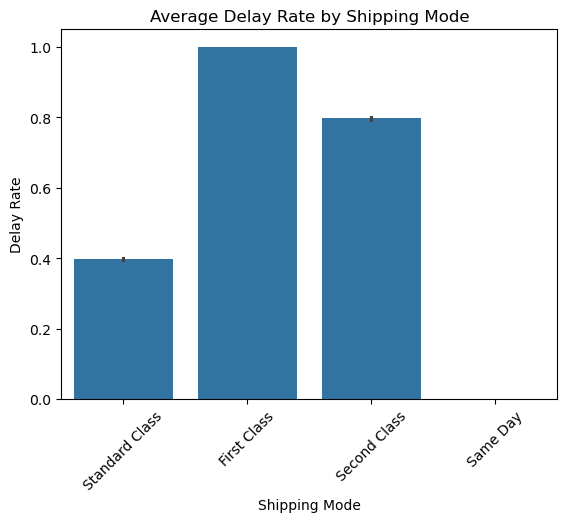

In [221]:
sns.barplot(df, x='Shipping Mode', y='delayed', estimator='mean')
plt.title("Average Delay Rate by Shipping Mode")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45)

Text(0, 0.5, 'Count')

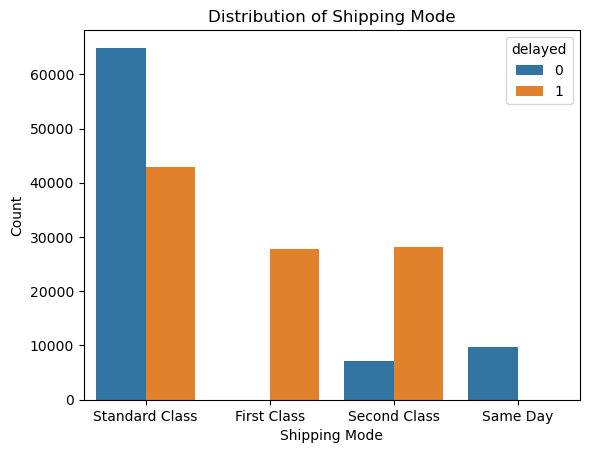

In [225]:
sns.countplot(df, x='Shipping Mode', hue='delayed')
plt.title("Distribution of Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")

In [267]:
df['Shipping Mode'].value_counts(normalize=True)

Shipping Mode
Standard Class    0.596900
Second Class      0.195085
First Class       0.154075
Same Day          0.053940
Name: proportion, dtype: float64

#### 📦 Shipping Mode Anomaly

From the EDA, we discovered that:

- `First Class` had a **100% delay rate**, which is suspicious.
- It also makes up **~15% of the dataset**, so dropping it would risk losing valuable data.
- This pattern could be caused by:
  - Data entry or labeling errors
  - Specific business scenarios misclassified under First Class

Therefore, we flagged it as a **potentially unreliable category** and handled it in feature engineering.

Text(0.5, 0, 'Shipping Duration')

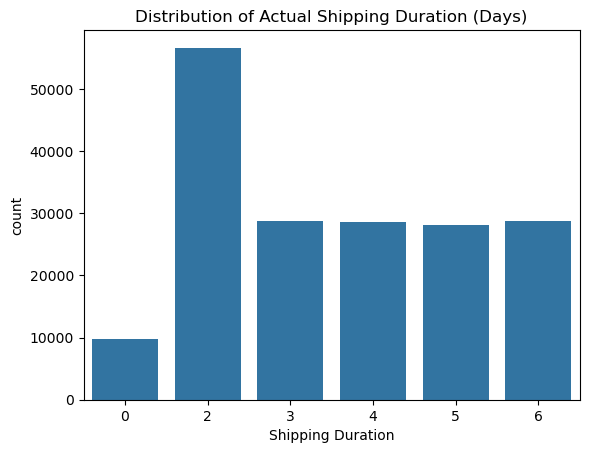

In [148]:
sns.countplot(df,x='shipping_duration')
plt.title("Distribution of Actual Shipping Duration (Days)")
plt.xlabel("Shipping Duration")

Text(0.5, 0, 'Average Delay Rate')

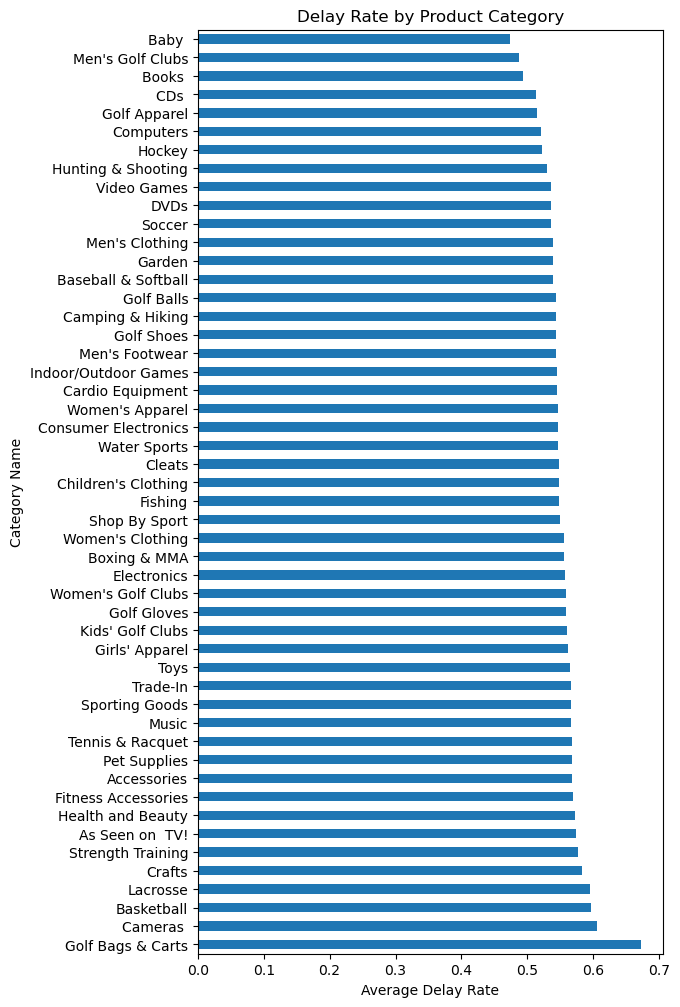

In [67]:
category_delay = df.groupby('Category Name')['delayed'].mean().sort_values(ascending=False)
plt.figure(figsize= (6,12))
category_delay.plot(kind='barh')
plt.title("Delay Rate by Product Category")
plt.xlabel("Average Delay Rate")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Central Africa'),
  Text(1, 0, 'Southeast Asia'),
  Text(2, 0, 'South Asia'),
  Text(3, 0, 'Western Europe'),
  Text(4, 0, 'Eastern Europe'),
  Text(5, 0, 'South of  USA '),
  Text(6, 0, 'West Asia'),
  Text(7, 0, 'East Africa'),
  Text(8, 0, 'East of USA'),
  Text(9, 0, 'US Center '),
  Text(10, 0, 'Central America'),
  Text(11, 0, 'Central Asia'),
  Text(12, 0, 'South America'),
  Text(13, 0, 'Northern Europe'),
  Text(14, 0, 'Eastern Asia'),
  Text(15, 0, 'West of USA '),
  Text(16, 0, 'Oceania'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'North Africa'),
  Text(19, 0, 'Caribbean'),
  Text(20, 0, 'West Africa'),
  Text(21, 0, 'Southern Africa'),
  Text(22, 0, 'Canada')])

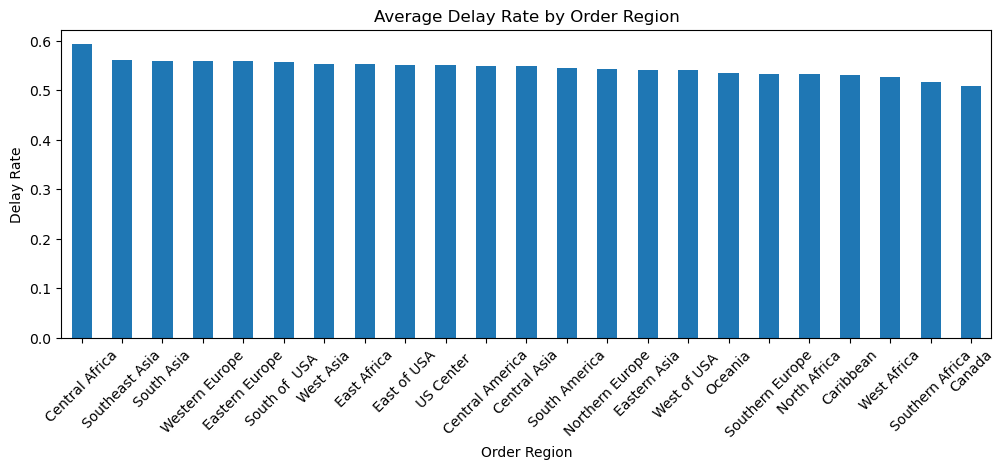

In [150]:
region_delay = df.groupby('Order Region')['delayed'].mean().sort_values(ascending=False)
region_delay.plot(kind='bar', figsize=(12,4))
plt.title("Average Delay Rate by Order Region")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

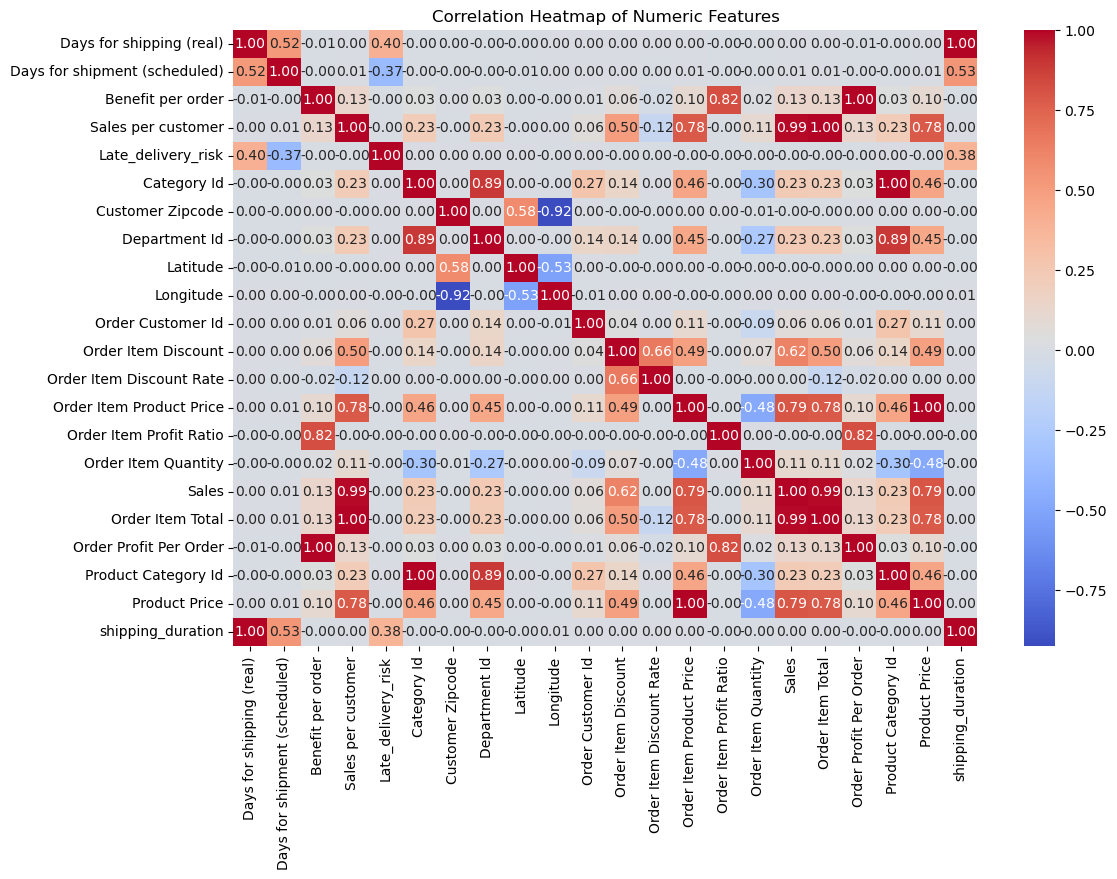

In [152]:
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")

## 🛠️ Feature Engineering

In [20]:
df_model = df.copy()

In [28]:
# Create a cleaned Shipping Mode feature
df_model['Shipping Mode Clean'] = df_model['Shipping Mode'].replace({
    'First Class': 'Unreliable'
})

# Add a flag for potentially unreliable mode (was First Class)
df_model['is_first_class'] = (df_model['Shipping Mode'] == 'First Class').astype(int)

# Drop original column to avoid confusion
df_model.drop(columns=['Shipping Mode'], inplace=True)

#### 🛠️ Shipping Mode Cleanup

Following EDA findings, we performed the following:

1. **Grouped** the suspicious `'First Class'` label into a new `'Unreliable'` category under `Shipping Mode Clean`
2. **Created a binary flag** `is_first_class` so the model can learn if this specific mode correlates with delays
3. **Dropped** the original `Shipping Mode` column to avoid redundancy

This ensures the model focuses on meaningful, cleaned features.

In [22]:
# Feature Engineering
df_model['order_dayofweek'] = df_model['order_date'].dt.dayofweek
df_model['order_month'] = df_model['order_date'].dt.month
df_model['is_high_discount'] = (df_model['Order Item Discount'] > 50).astype(int)
df_model['is_bulk_order'] = (df_model['Order Item Quantity'] > 3).astype(int)

In [24]:
# Avoid division by zero
df_model['discount_ratio'] = df_model['Order Item Discount'] / (df_model['Product Price'] + 1e-5)

In [26]:
# Drop leaky or post-delivery features
df_model = df_model.drop(columns=[
    'Days for shipping (real)',
    'shipping_duration',
    'Delivery Status',
    'Late_delivery_risk',
    'order_date',
    'ship_date'], axis=1)

In [30]:
# Drop high-cardinality or irrelevant columns
df_model = df_model.drop(columns= [
    'Customer Street', 'Customer Zipcode', 'Customer City', 'Customer State',
    'Customer Country', 'Product Name', 'Order Customer Id','Order State',
    'Order City', 'Order Country'], axis =1)

In [34]:
df_model.columns

Index(['Type', 'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Category Id', 'Category Name',
       'Customer Segment', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order Status', 'Product Category Id', 'Product Price', 'delayed',
       'order_dayofweek', 'order_month', 'is_high_discount', 'is_bulk_order',
       'discount_ratio', 'Shipping Mode Clean', 'is_first_class'],
      dtype='object')

In [32]:
X = df_model.drop(columns=['delayed'])
y = df_model['delayed']

In [36]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True, dtype ='int')

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=101, stratify=y)

Use stratify=y to maintain class balance in train/test splits and avoid skewed performance metrics, especially when the target is imbalanced, which is common in delivery delay problems.

## 🧠 Model Training: XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

In [44]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight= len(y_train[y_train==0]) / len(y_train[y_train==1])
)

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred = model.predict(X_test)

In [50]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.4).astype(int)

## 📈 Evaluation Metrics

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [54]:
print("📌 Default threshold (0.5):")
print(classification_report(y_test, model.predict(X_test)))

print("📌 Tuned threshold (0.4):")
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.4).astype(int)
print(classification_report(y_test, y_pred))

📌 Default threshold (0.5):
              precision    recall  f1-score   support

           0       0.64      0.91      0.75     24532
           1       0.89      0.57      0.70     29623

    accuracy                           0.73     54155
   macro avg       0.76      0.74      0.72     54155
weighted avg       0.77      0.73      0.72     54155

📌 Tuned threshold (0.4):
              precision    recall  f1-score   support

           0       0.65      0.88      0.75     24532
           1       0.86      0.60      0.71     29623

    accuracy                           0.73     54155
   macro avg       0.75      0.74      0.73     54155
weighted avg       0.76      0.73      0.72     54155



#### 🎯 Threshold Comparison

To evaluate classification performance, I compared two approaches:
- **Default XGBoost threshold (0.5):** Balanced precision and recall
- **Tuned threshold (0.4):** Boosted recall for delayed deliveries with only slight drop in precision

This choice reflects a business need: it’s more important to catch potential delays (even with some false alarms) than to miss them entirely.

In [56]:
from sklearn.model_selection import cross_val_score

In [58]:
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.72213605 0.75038085 0.66997202 0.70044041 0.71032878]
Mean accuracy: 0.7106516237650533


After exploring class imbalance, adjusting model weights, and applying SMOTE, I found the model's recall on delayed deliveries remained low. This suggests that delays in this dataset are driven by factors not fully captured in the features, a common challenge in real-world logistics modeling.

## 🔍 Feature Importance Interpretation
Actually I also explored explainability using SHAP, but ultimately used feature importance for clarity and interpretability in this project.

In [60]:
from xgboost import plot_importance

Text(0.5, 1.0, 'Top 10 Most Important Features')

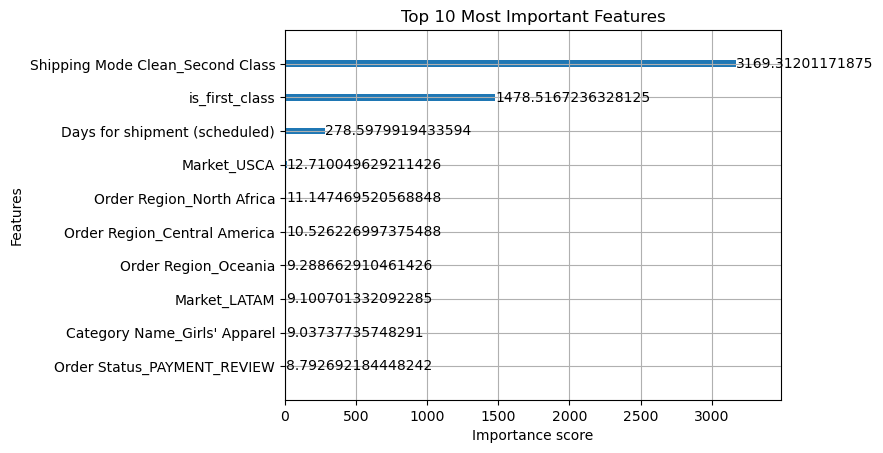

In [76]:
plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Most Important Features")

#### 🔍 Feature Importance

Top 5 most important features were identified using `model.feature_importances_` from the trained XGBoost model:

1. Shipping Mode Clean – Second Class
2. is_first_class (flag for former “First Class”)
3. Days for shipment (scheduled)
4. Market_USCA
5. Order Region_North Africa

These features significantly contributed to the model’s ability to identify likely delivery delays, aligning with expected business patterns.

## 🧠 Final Summary
This project applied an XGBoost classifier to predict delivery delays using a real  world supply chain dataset. Key highlights:

📊 Model performance: Achieved ~73% accuracy and improved recall for delayed orders from 0.57 to 0.60 through threshold tuning.

🧱 Feature engineering: Created domain-relevant features like shipping_duration, order_month, and flags for suspicious shipping modes.

📌 Top important features: Shipping Mode Clean – Second Class, `is_first_class`, scheduled shipping days, USCA market, and North Africa region.

🧼 Data quality check: Identified and corrected a suspicious "First Class" shipping mode with 100% delay rate.

🔍 Business insight: Delays are strongly influenced by shipping type (especially Second Class and flagged First Class) and specific markets like USCA and North Africa, with little evidence of seasonal impact, indicating internal logistics inefficiencies.

🧠 Skills demonstrated: EDA, feature engineering, XGBoost modeling, threshold tuning, and business-oriented interpretation.

This project combines technical modeling with real world business context, showing a structured approach to solving classification problems in logistics.

## 📌 Author
Novita Triwidianingsih
📫 [LinkedIn](https://www.linkedin.com/in/novitatrw94/) | 💻 [GitHub](https://github.com/Novitatrw30/my_portfolio/)